# bulbea
> Deep Learning based Python Library for Stock Market Prediction and Modelling

![](bulbea.png)

A canonical way of importing the `bulbea` module is as follows:

In [1]:
import bulbea as bb

### `bulbea.Share`

In order to analyse a desired share, we use the `Share` object defined under `bulbea` which considers 2 arguments - *the **source code** for the economic data* and *the **ticker symbol** for a said company*.

In [2]:
source, ticker = 'YAHOO', 'INDEX_GSPC'

Go ahead and create a `Share` object as follows:

In [53]:
share = bb.Share(source, ticker)

TypeError: unbound method warn() must be called with Color instance as first argument (got str instance instead)

In [10]:
import tushare as ts
data_ = ts.get_k_data('399300',start = '2004-10-01', ktype='D')

By default, a `Share` object for a said source and symbol provides you historical data since a company's inception, as a `pandas.DataFrame` object. In order to access the same, use the `Share` object's member variable - `data` as follows:

In [42]:
import pandas as pd

share = pd.DataFrame(index = data_.date,columns= data_.columns )
share = share.drop(['date','code'], axis=1)
share['Open'] = data_['open'].values
share['Close'] = data_['close'].values
share['High'] = data_['high'].values
share['Low'] = data_['low'].values
share['Volume'] = data_['volume'].values
share['Adjusted Close'] = data_['volume'].values

 

In [43]:
data     = share.data
nsamples = 5
data.tail(nsamples)

AttributeError: 'DataFrame' object has no attribute 'data'

In order to analyse a given attribute, you could plot the same as follows:

In [44]:
figsize = (20, 15)

% matplotlib inline

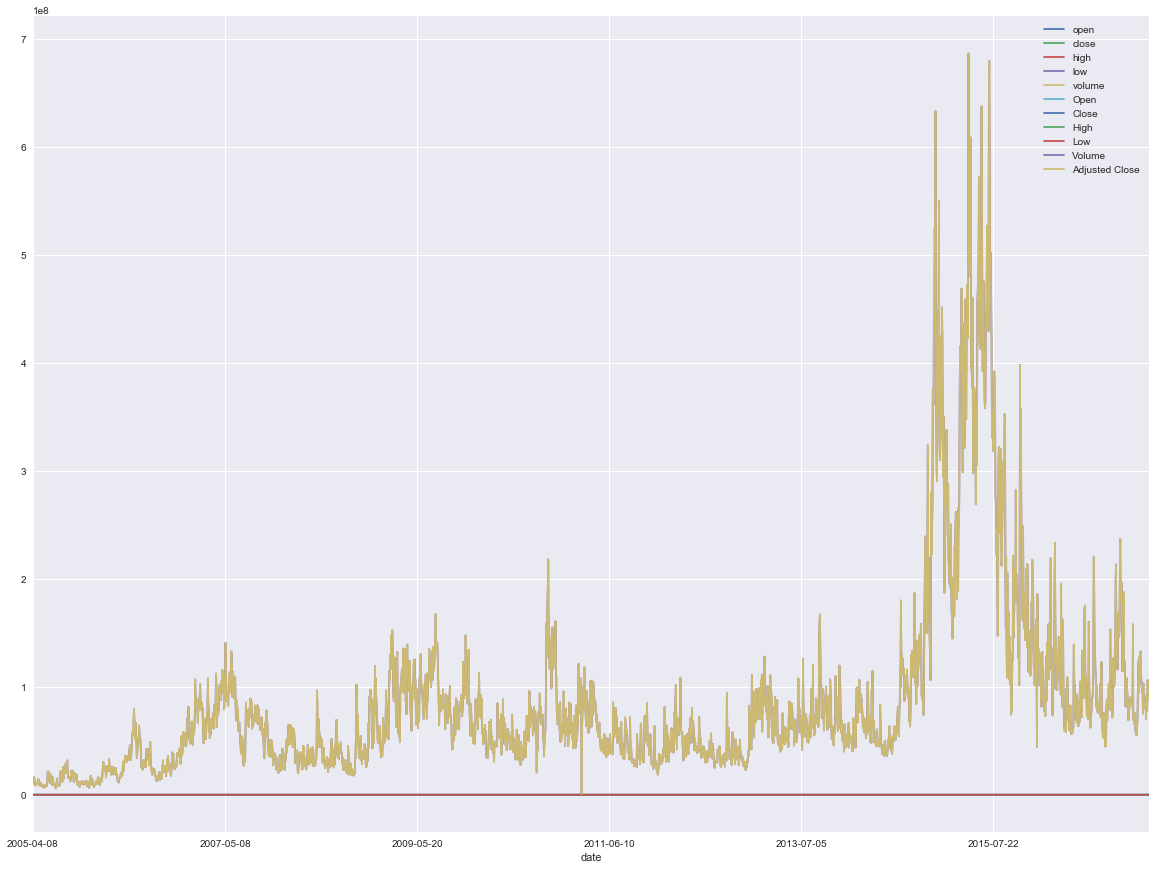

In [45]:
share.plot(figsize = figsize)

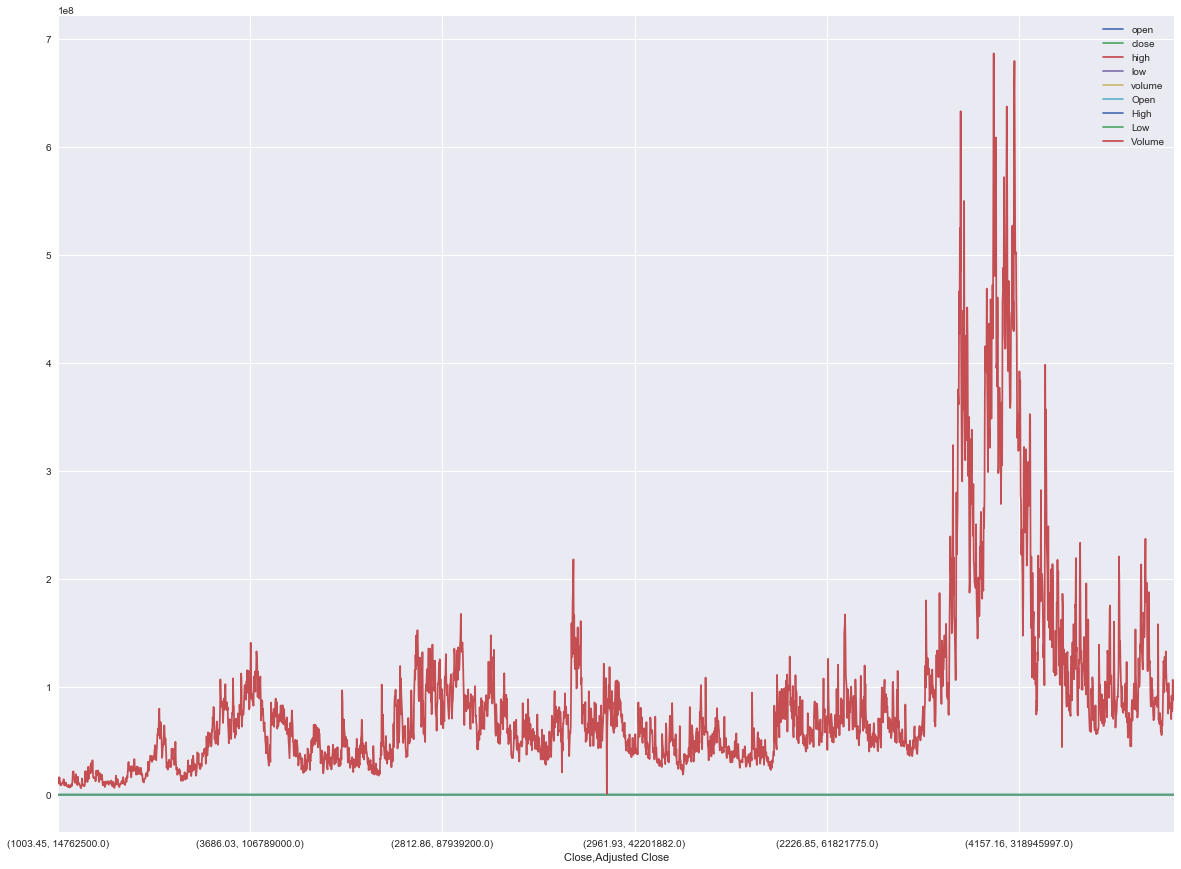

In [46]:
share.plot(['Close', 'Adjusted Close'], figsize = figsize)

### Statistics

#### Global Mean
In order to plot the **global mean** of the stock, we could do the same as follows:

AttributeError: Unknown property global_mean

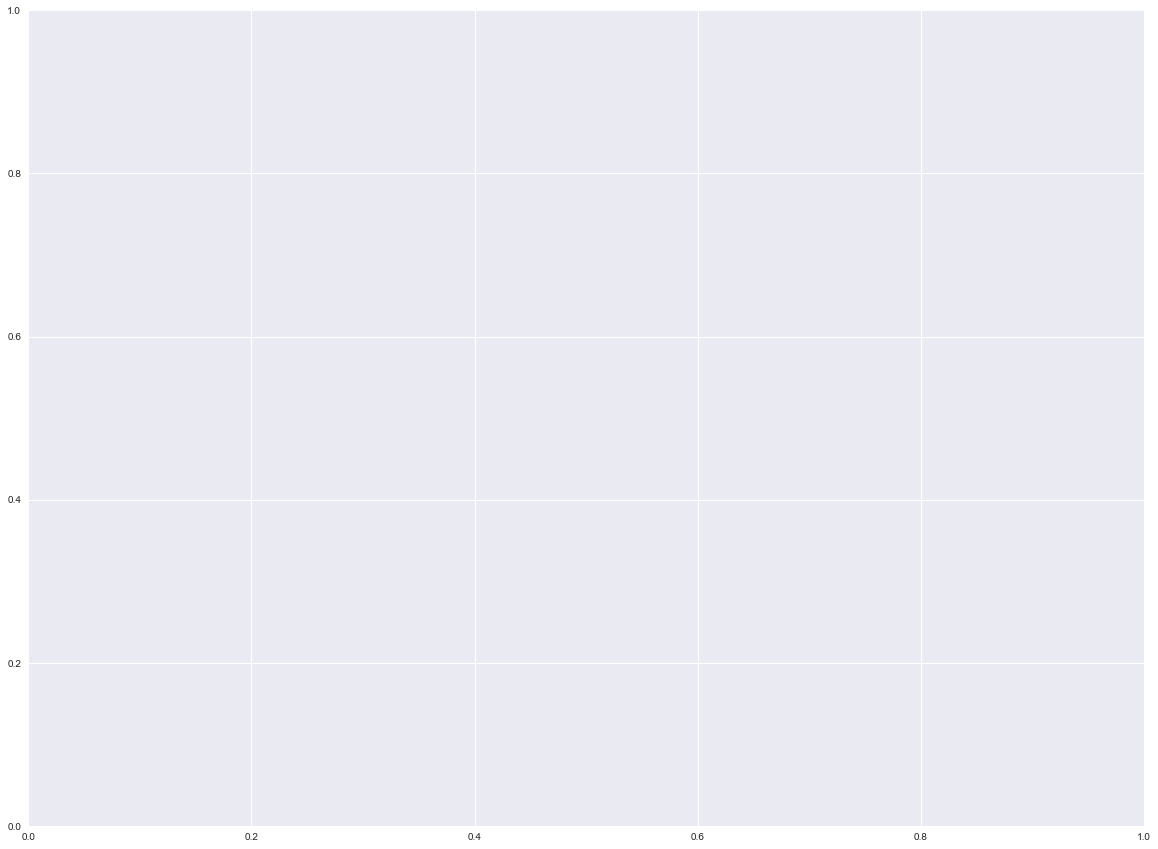

In [48]:
share.plot(figsize = (20, 15), global_mean = True)

#### Moving Averages and Bollinger Bands (R)

In [49]:
bands = share.bollinger_bands(period = 50, bandwidth = 2)
bands.tail(nsamples)

AttributeError: 'DataFrame' object has no attribute 'bollinger_bands'

In [ ]:
share.plot(['Close', 'Adjusted Close'], figsize = (20, 15), bollinger_bands = True, period = 100, bandwidth = 2)

### Training & Testing

In [ ]:
from bulbea.learn.evaluation import split

In [ ]:
scaler, Xtrain, Xtest, ytrain, ytest = split(share, 'Close', normalize = True)

In [ ]:
import numpy as np

In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], Xtrain.shape[1], 1))
Xtest  = np.reshape(Xtest,  ( Xtest.shape[0],  Xtest.shape[1], 1))

### Modelling

In [ ]:
layers      = [1, 100, 100, 1] # number of neurons in each layer
nbatch      = 512              
epochs      = 5     
nvalidation = 0.05

In [ ]:
from bulbea.learn.models import RNN
from bulbea.learn.models.ann import RNNCell

In [ ]:
rnn = RNN(layers, cell = RNNCell.LSTM)

#### TRAINING

In [ ]:
rnn.fit(Xtrain, ytrain,
        batch_size       = nbatch,
        nb_epoch         = epochs,
        validation_split = nvalidation)

#### TESTING

In [ ]:
predicted = rnn.predict(Xtest)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(ytest, predicted)

In [ ]:
from bulbea.entity.share import _plot_bollinger_bands
import pandas as pd
import matplotlib.pyplot as pplt

figsize          = (20, 15)
figure           = pplt.figure(figsize = figsize)

axes             = figure.add_subplot(111)

series           = pd.Series(data = scaler.inverse_transform(ytest))

# axes.plot(scaler.inverse_transform(ytest))
axes.plot(scaler.inverse_transform(predicted))

_plot_bollinger_bands(series, axes, bandwidth = 10)

### Sentiment Analysis

In [ ]:
s = bb.sentiment(share)
s